# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [23]:
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None

    def fit(self, X, y):
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        labels = np.unique(y)
  
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_W = np.zeros((n_features, n_features))
        S_B = np.zeros((n_features, n_features))
        mean_overall = np.mean(X, axis=0)
        for label in labels:
            x_c = X[y == label]
            mean_c = np.mean(x_c, axis=0)
            S_W += (x_c - mean_c).T @ (x_c - mean_c)

        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
            n_c = x_c.shape[0] # 类内的样本数量
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            S_B += n_c * (mean_diff @ mean_diff.T) 

      
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        A = np.linalg.inv(S_W) @ S_B

        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        eigenvalues, eigenvectors = np.linalg.eig(A)

        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx][:n_components]
        eigenvectors = eigenvectors[:, idx][:, :n_components]
  
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X, y):
        ########### Write Your Code Here ###########
        self.fit(X, y)
        return self.transform(X)  
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        return np.dot(X, self.eigenvectors)  

- <font size=4> Dimensionality reduction visualization<font>

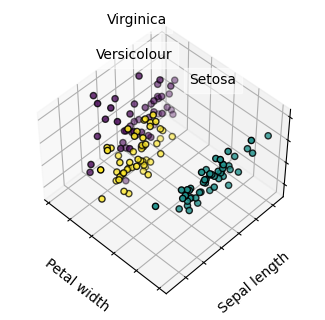

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
# ax.dist = 12
ax.set_box_aspect(None, zoom=0.9)

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)

d:\Softwares\anaconda3\envs\CS329-ML\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### Loading the MNIST Dataset


In [26]:
########### Write Your Code Here ###########
X, y = np.array(mnist["data"]), np.array(mnist["target"])
X.shape, y.shape
############################################

((70000, 784), (70000,))

###  Visualization of MINIST

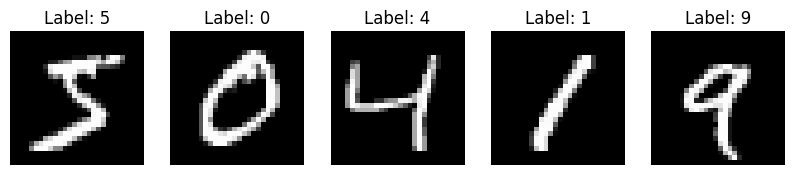

In [27]:
# Visualize MINIST
########### Write Your Code Here ###########
# 选择你想要展示的图片数量
num_images = 5

# 使用 matplotlib 显示图像
fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
for i in range(num_images):
    ax = axes[i]
    img = X[i].reshape(28, 28)
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title("Label: " + str(y[i]))
plt.show()
############################################

### Fit  Model

In [28]:
########### Write Your Code Here ###########
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

lda = LDA()
lda.fit(X_train, y_train)
############################################

LinearDiscriminantAnalysis()

## Evaluate model

In [29]:
########### Write Your Code Here ###########
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_pred = lda.predict(X_test)
print(classification_report(y_test, y_pred))
############################################


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1389
           1       0.88      0.96      0.91      1593
           2       0.91      0.81      0.86      1409
           3       0.86      0.85      0.85      1407
           4       0.86      0.91      0.88      1348
           5       0.83      0.81      0.82      1266
           6       0.92      0.91      0.92      1380
           7       0.92      0.84      0.88      1494
           8       0.79      0.81      0.80      1333
           9       0.81      0.86      0.84      1381

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000



<Figure size 800x600 with 0 Axes>

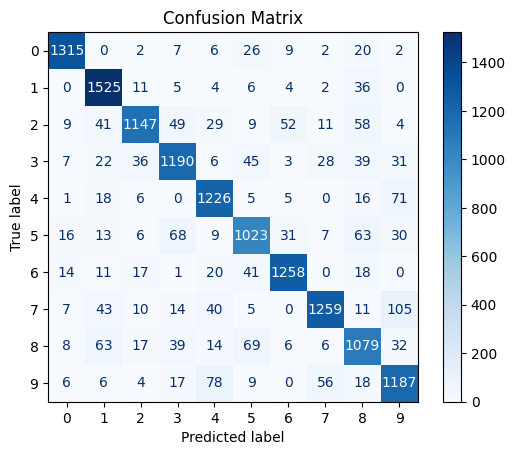

In [30]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(lda, X_test, y_test, cmap=plt.cm.Blues, display_labels=np.unique(y))
plt.title("Confusion Matrix")
plt.show()

In [31]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.model_selection import cross_val_score

# # 创建一个包含 LDA 模型的 Bagging 分类器
# bagging_clf = BaggingClassifier(LDA(), n_estimators=10, max_samples=0.8, max_features=0.8)

# # 评估模型的准确性
# bagging_scores = cross_val_score(bagging_clf, X_train, y_train, cv=5)

# print(f"Mean cross-validation accuracy for bagged LDA: {np.mean(bagging_scores)}")

# Mean cross-validation accuracy for bagged LDA: 0.8675535714285715

In [32]:
from sklearn.model_selection import GridSearchCV

# 设置想要优化的超参数
params = {'shrinkage': np.arange(0.05, 0.15, 0.01)}

# 创建带有 GridSearch 的 LDA 实例
lda_gs = GridSearchCV(LDA(solver='lsqr'), params, cv=4)

# 拟合 GridSearchCV
lda_gs.fit(X_train, y_train)

# 查看最佳参数和最佳分数
print("Best Parameters: ", lda_gs.best_params_)
print("Best score is: ", lda_gs.best_score_)

# Best Parameters:  {'shrinkage': 0.1}
# Best score is:  0.8706071428571429

Best Parameters:  {'shrinkage': 0.13}
Best score is:  0.8708214285714285


In [34]:
print(classification_report(y_test, LDA(solver='lsqr', shrinkage=0.13).fit(X_train, y_train).predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1389
           1       0.88      0.96      0.91      1593
           2       0.92      0.82      0.87      1409
           3       0.87      0.85      0.86      1407
           4       0.86      0.91      0.89      1348
           5       0.83      0.81      0.82      1266
           6       0.92      0.92      0.92      1380
           7       0.93      0.86      0.89      1494
           8       0.80      0.82      0.81      1333
           9       0.82      0.88      0.85      1381

    accuracy                           0.88     14000
   macro avg       0.88      0.88      0.88     14000
weighted avg       0.88      0.88      0.88     14000



### Exercise 3: Qustions
- Q1:What are the advantages and disadvantages of LDA?


- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?